In [1]:
import pandas as pd

## 3. Review our results

In [2]:
# Our results
my_df = pd.read_csv('analyzed_studies.csv')

<Axes: xlabel='llm_decision', ylabel='count'>

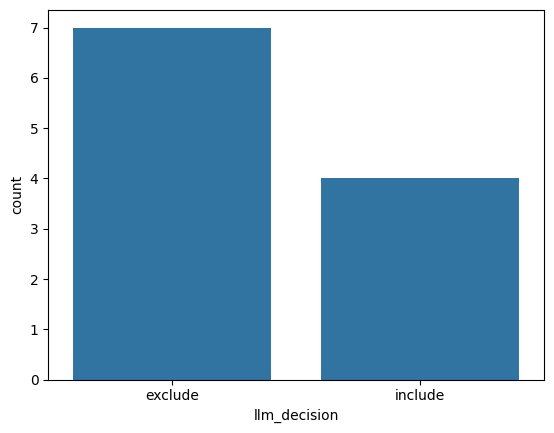

In [3]:
import seaborn as sns
sns.countplot(my_df, x='llm_decision')

In [4]:
from IPython.display import display, Markdown
def preview(df):
    display(Markdown(df.iloc[0].T.to_markdown()))

preview(my_df)

|                          | 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|:-------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| study_identifier         | {'title': 'Rejuvesol: Package Insert', 'abstract': 'Abstract not available in the source database.'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| llm_analysis             | {'include_criteria_met': ['English language'], 'exclude_criteria_met': ['Non-peer-reviewed or preprint', 'No liposome-RBC interaction implications'], 'decision': 'exclude', 'reasoning_summary': ['The screening process began by assessing Exclusion Criteria, according to Decision Logic 1.', "The exclusion criterion 'Non-peer-reviewed or preprint' is met. The title 'Rejuvesol: Package Insert' indicates that the document is a package insert. Package inserts are regulatory documents for medicinal products and are not considered peer-reviewed scientific publications or preprints.", "The exclusion criterion 'No liposome-RBC interaction implications' is also met. The title 'Rejuvesol: Package Insert' provides no information about liposomes or their interactions with RBCs. The abstract is 'Abstract not available in the source database,' so it offers no details on this subject.", "As per Decision Logic 1, if ANY exclusion criterion is met, the decision is 'exclude'. Since 'Non-peer-reviewed or preprint' (and 'No liposome-RBC interaction implications') are met, the paper is decisively excluded.", "For completeness, the 'English language' inclusion criterion was checked (Decision Logic 3). The title 'Rejuvesol: Package Insert' is in English, so this criterion is met.", "Other inclusion criteria were assessed: 'Effects on RBC properties/function', 'Liposome-RBC interaction', 'Relevant study type', 'Liposome/RBC properties with interaction implications', 'Applications of liposome-RBC interactions', and 'Theoretical/computational study' are not met. The title does not provide information to satisfy these criteria, and the abstract is unavailable.", "Despite meeting the 'English language' criterion, the paper is excluded because exclusion criteria were met. Furthermore, the conditions for inclusion (Decision Logic 4 or 5) are not fulfilled due to the lack of relevant content regarding liposome-RBC interactions or effects on RBCs."]} |
| llm_include_criteria_met | ['English language']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| llm_exclude_criteria_met | ['Non-peer-reviewed or preprint', 'No liposome-RBC interaction implications']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| llm_decision             | exclude                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| llm_reasoning_summary    | ['The screening process began by assessing Exclusion Criteria, according to Decision Logic 1.', "The exclusion criterion 'Non-peer-reviewed or preprint' is met. The title 'Rejuvesol: Package Insert' indicates that the document is a package insert. Package inserts are regulatory documents for medicinal products and are not considered peer-reviewed scientific publications or preprints.", "The exclusion criterion 'No liposome-RBC interaction implications' is also met. The title 'Rejuvesol: Package Insert' provides no information about liposomes or their interactions with RBCs. The abstract is 'Abstract not available in the source database,' so it offers no details on this subject.", "As per Decision Logic 1, if ANY exclusion criterion is met, the decision is 'exclude'. Since 'Non-peer-reviewed or preprint' (and 'No liposome-RBC interaction implications') are met, the paper is decisively excluded.", "For completeness, the 'English language' inclusion criterion was checked (Decision Logic 3). The title 'Rejuvesol: Package Insert' is in English, so this criterion is met.", "Other inclusion criteria were assessed: 'Effects on RBC properties/function', 'Liposome-RBC interaction', 'Relevant study type', 'Liposome/RBC properties with interaction implications', 'Applications of liposome-RBC interactions', and 'Theoretical/computational study' are not met. The title does not provide information to satisfy these criteria, and the abstract is unavailable.", "Despite meeting the 'English language' criterion, the paper is excluded because exclusion criteria were met. Furthermore, the conditions for inclusion (Decision Logic 4 or 5) are not fulfilled due to the lack of relevant content regarding liposome-RBC interactions or effects on RBCs."]                                                                                                                                                                                                    |

In [5]:
my_df.loc[0]['llm_decision']

'exclude'

## 2. Run screening agent

Run `first_gemini_prototype.py` 

## 1. Preprocess dataset

Data source: https://huggingface.co/datasets/UtopiansRareTruth/Liposome-RBC_Scoping_Review_Screening

Data license: MIT

In [6]:
import json
with open('Liposome-RBC_Scoping_Review_Screening.json', 'r') as f:
    df = pd.json_normalize(json.load(f))  # load as JSON to parse nested dicts as cols
df.set_index('study_identifier.key', inplace=True)

In [7]:
preview(df)

|                                                 | rayyan-75172665                                                                                                                                                                                                                                                                 |
|:------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| study_identifier.title                          | Rejuvesol: Package Insert                                                                                                                                                                                                                                                       |
| study_identifier.doi                            | DOI not available                                                                                                                                                                                                                                                               |
| study_identifier.abstract                       | Abstract not available in the source database.                                                                                                                                                                                                                                  |
| title_abstract_screening.context                | []                                                                                                                                                                                                                                                                              |
| title_abstract_screening.thoughts               | ['There is no abstract available for this study.', "Without an abstract, it's impossible to determine if the study is relevant to liposome-RBC interactions.", "The title 'Rejuvesol: Package Insert' doesn't provide enough information to infer relevance to the topic."]     |
| title_abstract_screening.summary                | Due to the lack of an abstract and insufficient information in the title, it's impossible to assess this study's relevance to liposome-RBC interactions.                                                                                                                        |
| title_abstract_screening.inclusion_criteria_met | []                                                                                                                                                                                                                                                                              |
| title_abstract_screening.exclusion_criteria_met | ['Full text unavailable']                                                                                                                                                                                                                                                       |
| final_decision.context                          | ['No abstract is available for this study.', "The title doesn't provide enough information to determine relevance."]                                                                                                                                                            |
| final_decision.thoughts                         | ['Without an abstract, we cannot evaluate the study against the inclusion criteria.', "The lack of information meets the exclusion criterion 'Full text unavailable'.", "It's not possible to make an informed decision about the study's relevance without more information."] |
| final_decision.summary                          | Due to the absence of an abstract and lack of information in the title, this study cannot be evaluated for relevance to liposome-RBC interactions. It must be excluded based on the 'Full text unavailable' criterion.                                                          |
| final_decision.decision                         | Exclude                                                                                                                                                                                                                                                                         |

In [8]:
# Create a new DataFrame with only 'title' and 'abstract' from 'study_identifier'
col_rename_map = {
    'study_identifier.title': 'title',
    'study_identifier.abstract': 'abstract'
}
my_df = df.copy()
my_df = my_df[col_rename_map.keys()]
my_df = my_df.rename(columns=col_rename_map)

In [9]:
preview(my_df)

|          | rayyan-75172665                                |
|:---------|:-----------------------------------------------|
| title    | Rejuvesol: Package Insert                      |
| abstract | Abstract not available in the source database. |

In [10]:
# Drop any records with missing abstracts
def missing_abstract_mask(df):
    return (df['abstract'] == 'Abstract not available in the source database.')

print(f"Before: {len(my_df[missing_abstract_mask(my_df)])} missing abstract(s)")
my_df.drop(my_df[missing_abstract_mask].index, inplace=True)
print(f"After: {len(my_df[missing_abstract_mask(my_df)])} missing abstract(s)")

Before: 88 missing abstract(s)
After: 0 missing abstract(s)


In [11]:
import pickle
with open('my_df.pkl', 'wb') as f:
    pickle.dump(my_df,f)